## Correlation and Regression
Correlation and regression are the most commonly used techniques for investigating relationship between two quantitative variables.

Strength of the relationship is quantified by Correlation Coefficient.

Relationship in the form of an equation is expressed by the regression.

In [1]:
import statsmodels.api as sm
cars = sm.datasets.get_rdataset('mtcars').data

The dataset, mtcars is an in-built data set about cars which contains 32 observations and 11 variables.

The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).
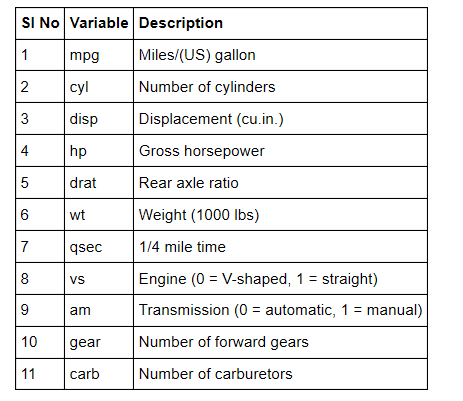

In [2]:
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


There are 6 continuous and 5 categorical features

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
mpg     32 non-null float64
cyl     32 non-null int64
disp    32 non-null float64
hp      32 non-null int64
drat    32 non-null float64
wt      32 non-null float64
qsec    32 non-null float64
vs      32 non-null int64
am      32 non-null int64
gear    32 non-null int64
carb    32 non-null int64
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB


In [4]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,32.0,20.090625,6.026948,10.400,15.42500,19.200,22.80,33.900
cyl,32.0,6.187500,1.785922,4.000,4.00000,6.000,8.00,8.000
disp,32.0,230.721875,123.938694,71.100,120.82500,196.300,326.00,472.000
hp,32.0,146.687500,68.562868,52.000,96.50000,123.000,180.00,335.000
drat,32.0,3.596563,0.534679,2.760,3.08000,3.695,3.92,4.930
wt,32.0,3.217250,0.978457,1.513,2.58125,3.325,3.61,5.424
qsec,32.0,17.848750,1.786943,14.500,16.89250,17.710,18.90,22.900
vs,32.0,0.437500,0.504016,0.000,0.00000,0.000,1.00,1.000
am,32.0,0.406250,0.498991,0.000,0.00000,0.000,1.00,1.000
gear,32.0,3.687500,0.737804,3.000,3.00000,4.000,4.00,5.000


In [5]:
#inportant libraries
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import statsmodels.api   as sm

# Assumptions of Linear Regression

### 1. Linear relationship between X and Y.
	 If you fit a linear model to a non-linear, non-additive data set, the regression algorithm would fail to capture the trend mathematically, thus resulting in an inefficient model. Also, this will result in erroneous predictions on an unseen data set.
	Test: Look for residual vs fitted value plots (explained below). Also, you can include polynomial terms (X, X², X³) in your model to capture the non-linear effect. Can also test by plotting a simple scatter plot between X and Y.


Scatter plot between X and Y also explains the Linear relationship

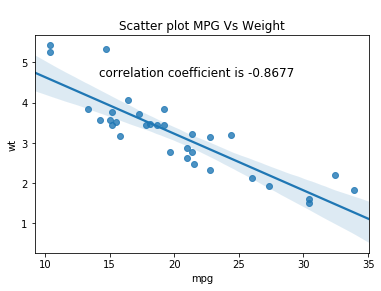

In [6]:
corcoef = np.corrcoef(cars.mpg, cars.wt)[0,1]
text_cc = '\n\n\n\ncorrelation coefficient is %1.4f'%corcoef
plt.title('Scatter plot MPG Vs Weight')
plt.suptitle(text_cc)

sns.regplot(x=cars.mpg, y=cars.wt, ci = 95)
plt.show()

## 2. No Autocorrelation in errors:
	The presence of correlation in error terms drastically reduces model’s accuracy. This usually occurs in time series models where the next instant is dependent on previous instant. If the error terms are correlated, the estimated standard errors tend to underestimate the true standard error.
	Test: Look for Durbin – Watson (DW) statistic. It must lie between 0 and 4. If DW = 2, implies no autocorrelation, 0 < DW < 2 implies positive autocorrelation while 2 < DW < 4 indicates negative autocorrelation. Also, you can see residual vs time plot and look for the seasonal or correlated pattern in residual values.


Durbin – Watson (DW) statistic from Linear Regression in Statsmodels

In [23]:
import statsmodels.api as sm
X  =  cars.wt
y  =  cars.mpg

X = sm.add_constant(X) # Add an intercept to our model

model         = sm.OLS(y, X).fit() ## OLS(output, input)
predictions   = model.predict(X)

## Print the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Fri, 02 Aug 2019   Prob (F-statistic):           1.29e-10
Time:                        18:23:15   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2851      1.878     19.858      0.0

## 3. Homoskedasticity:
	The presence of non-constant variance in the error terms results in heteroskedasticity. Generally, non-constant variance arises in presence of outliers or extreme leverage values. Look like, these values get too much weight, thereby disproportionately influences the model’s performance. When this phenomenon occurs, the confidence interval for out of sample prediction tends to be unrealistically wide or narrow.
	TEST: You can look at residual vs fitted values plot. If heteroskedasticity exists, the plot would exhibit a funnel shape pattern (shown in next section). Also, you can use Breusch-Pagan / Cook – Weisberg test or White general test to detect this phenomenon.

Residual plots

Residual plot is a scatter plot of fitted values against the residuals, with a locally weighted scatterplot smoothing (lowess) regression line showing any apparent trend.
Using seaborn, residplot() with fitted values as x parameter, and the dependent variable as y. The argument, lowless = True makes sure the lowess regression line is drawn.

Lowess stands for Locally wighted least sqaures.
Lowess is a data analysis technique for producing a Smooth set of values from a scatter plot with a noisy* relationship between the two variables.

In [8]:
sns.set(style="whitegrid")
import statsmodels.api as sm
X  =  cars.wt
y  =  cars.mpg

X = sm.add_constant(X) # Add an intercept to our model

model                 = sm.OLS(y, X).fit() ## OLS(output, input)
cars['predictions']   = model.predict(X)
residuals             = model.resid

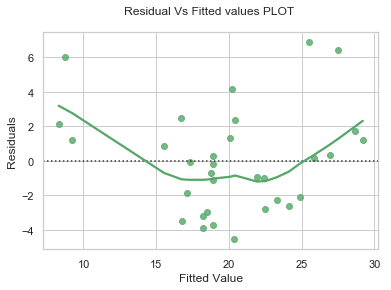

In [9]:

# Plot the residuals after fitting a linear model
ax = sns.residplot(cars.predictions, residuals, lowess = True, color = "g")
ax.set(xlabel='Fitted Value', ylabel='Residuals', title = 'Residual Vs Fitted values PLOT \n')
plt.show()

# 4.Normal Distribution of error terms:
If the error terms are non- normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Presence of non – normal distribution suggests that there are a few unusual data points which must be studied closely to make a better model.
How to check: You can look at QQ plot (shown below). You can also perform statistical tests of normality such as Kolmogorov-Smirnov test, Shapiro-Wilk test.

Draw a histogram of the residuals

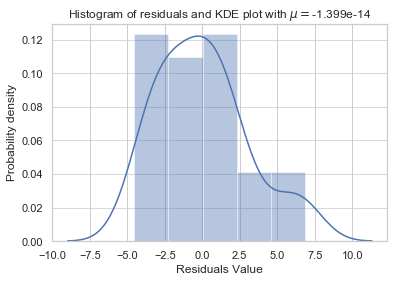

In [10]:
sns.set(style="whitegrid")
sns.distplot(residuals)

plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Residuals Value')
plt.ylabel('Probability density') # It is the probability per unit on the x-axis.

mean     =   residuals.mean()

plt.title('Histogram of residuals and KDE plot with ' + r'$\mu = $' + str(np.round(mean,17)))
plt.show()

Ideal Plot

We expect the random errors to produce residuals that are normally distributed. So, the residuals should fall in a symmetrical pattern and have a constant spread throughout the range.

Q Q PLOT

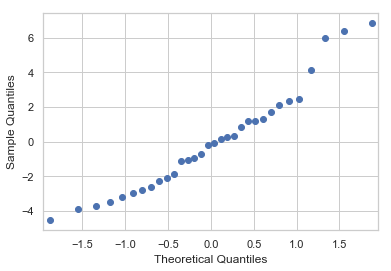

In [11]:
fig = sm.qqplot(residuals)
plt.show()

There are many deviations from the straight line and hence the residuals do not fit the normal distribution.

# 5. No or little Multicollinearity:
	This phenomenon exists when the independent variables are found to be moderately or highly correlated. In a model with correlated variables, it becomes a tough task to figure out the true relationship of a predictors with response variable. In other words, it becomes difficult to find out which variable is actually contributing to predict the response variable.
	Test: You can use scatter plot to visualize correlation effect among variables. Also, you can also use VIF factor. VIF value <= 4 suggests no multicollinearity whereas a value of >= 10 implies serious multicollinearity. Above all, a correlation table should also solve the purpose.


In [12]:
cars.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb', 'predictions'],
      dtype='object')

In [13]:
X    = cars[['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear','carb', 'predictions']]
y    = cars.mpg

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

[variance_inflation_factor(X.values, j) for j in range(1, X.shape[1])]

[21.620241028958883,
 9.832036844359056,
 3.374620008314751,
 600.7992116523823,
 7.527958225291088,
 4.965873466484715,
 4.64848745550016,
 5.35745210594066,
 7.908746751184423,
 493.89002054083]

In [15]:
def calculate_vif(x):
    thresh = 100.0 #set threshold here
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
#         print("Max VIF is for variable no.:")
#         print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

In [16]:
train_out = calculate_vif(X)

Iteration no.
1
[15.37383340344222, 21.620241028958883, 9.832036844359056, 3.374620008314751, 600.7992116523823, 7.527958225291088, 4.965873466484715, 4.64848745550016, 5.35745210594066, 7.908746751184423, 493.89002054083]
Iteration no.
2
[161.24957151586207, 79.7936762723757, 55.90979584380463, 151.83879228339754, 168.5253032414237, 8.701933811039817, 7.69910046202631, 136.65695922921157, 29.854237846130765, 150.3933658552862]
Iteration no.
3
[143.09083769484525, 74.78539509614977, 47.343829764127904, 128.97032567439908, 5.945938211771066, 6.770270714462535, 128.22169888854995, 29.84213648804049, 148.01584392642965]
Iteration no.
4
[79.04656261750543, 38.00591649823236, 45.21008393347017, 95.37191313519288, 5.883748623010366, 6.511860296158713, 100.39773737123402, 15.485348655171377]
Iteration no.
5
[77.7369646371158, 37.78801631145948, 44.89371954354733, 54.87258386660498, 5.4288647677534625, 5.230633425049231, 13.768474487262548]


In [17]:
train_out.head()

,cyl,disp,hp,drat,vs,am,carb
Mazda RX4,6,160.0,110,3.90,0,1,4
Mazda RX4 Wag,6,160.0,110,3.90,0,1,4
Datsun 710,4,108.0,93,3.85,1,1,1
Hornet 4 Drive,6,258.0,110,3.08,1,0,1
Hornet Sportabout,8,360.0,175,3.15,0,0,2


Inference

We don't see any variable having VIF more than the threshold. Hence there is no multi-collinearity.

Heat map shows the correlation among the features

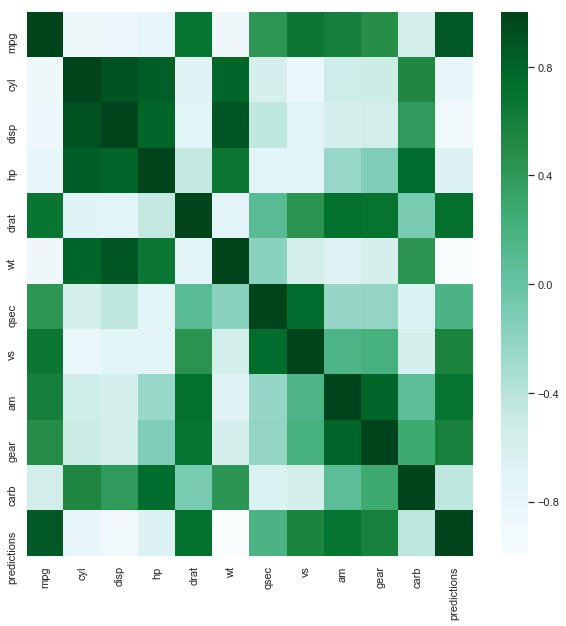

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(cars.corr(), cmap='BuGn')
plt.show()

# Predictions and Scores

In [19]:
import statsmodels.api as sm
X  =  cars.wt
y  =  cars.mpg

X = sm.add_constant(X) # Add an intercept to our model

model         = sm.OLS(y, X).fit() ## OLS(output, input)
predictions   = model.predict(X)


RSquared from scratch

In [20]:
# calculate SSE, SSM & SST

SSE   = 0
SST   = 0

for i in range(len(predictions)):
    SSE    += (predictions[i] - y[i])**2

yMean       = np.mean(y)

for i in range(len(predictions)):
    SST    += (y[i] - yMean)**2

print('SSE = %5.4f SST = %5.4f' % (SSE, SST))

Rsq = np.round(1 - (SSE / SST),4)

print("Calculated %s = %1.3f" % ("R squared",Rsq) )

SSE = 278.3219 SST = 1126.0472
Calculated R squared = 0.753


In [21]:
## Print the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Fri, 02 Aug 2019   Prob (F-statistic):           1.29e-10
Time:                        18:22:41   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2851      1.878     19.858      0.000      33.450      41.120
wt            -5.3445      0.559     -9.559      0.000      -6.486      -4.203
==============================================================================
Omnibus:                        2.988   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                2.399
Skew:                           0.668   Prob(JB):                        0.301
Kurtosis:                       2.877   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation:

The coefficient of -5.3445 means that as the wt variable increases by 1 unit, the predicted value of mpg decreases by 5.3445.

R squared give the percentage of variance our model explains. Our model explains 75.3% of variation

Standard error is the standard deviation of the sampling distribution of a statistic such as mean.

The t scores and p-values for the hypothesis test the wt has statistically significant p-value at 5% level of significance since p-value is less than 5%. 
There is a 95% confidence intervals for the wt.
* We predict at 95% confidence that the value of wt is between -6.486 and -4.203

### Regression equation is given below:
mpg = 37.2851 - 5.3345 * wt

This model explains 75.3% of variation
When wt increases by 1 unit, the mpg decreases by -5.3445.


### Predict the mpg of the car for wt = 3000 lbs

In [22]:
new_X = [ 1, 3.0] # Here we give 1 as the constant for the intercept of model and 3 (in '000s) as the weight 
predictions   = model.predict(new_X)
print('Predicted mpg of the car with weight  %d(000 lbs) is %2.2f' % (3.0, np.round(predictions,3)))

Predicted mpg of the car with weight  3(000 lbs) is 21.25
